## Perform PCA and Project

In [311]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plot_direction(points, direction):
    plt.scatter(points[:,0], points[:,1])
    plt.xlim(points.min(axis=0)[0] - 1, points.max(axis=0)[0] + 1)
    plt.ylim(points.min(axis=0)[1] - 1, points.max(axis=0)[1] + 1)
    plt.plot([-100 * direction[0], 100 * direction[0]], [-100 * direction[1], 100 * direction[1]])
    plt.axes().set_aspect('equal')

In [279]:
data = np.array([[2, 2], [3, 3], [3, 2], [4, 3], [5, 5]]).astype(float)

Components:
 [[-0.73476024 -0.6783269 ]
 [ 0.6783269  -0.73476024]]
Variance: [ 1.04  1.2 ]


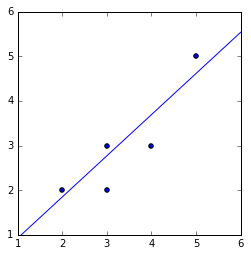

In [305]:
def pca(data):
    shifted = data - np.mean(data, axis=0)[None, :]
    assert np.allclose(np.mean(shifted), 0)
    covariance = shifted.T.dot(shifted) / len(shifted)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    components = eigenvectors[:,np.argsort(eigenvalues)]
    return components

print('Components:\n', pca(data))
print('Variance:', data.var(axis=0))
plot_direction(data, pca(data)[0])

Variance: [ 2.11043566  0.        ]


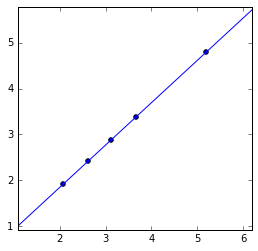

In [314]:
def project(data, components):
    projected = components.dot(data.T).T
    projected[:,1] = 0
    variance = (projected - projected.mean(axis=0)) ** 2
    variance = variance.mean(axis=0)
    projected = components.T.dot(projected.T).T
    return projected, variance

print('Variance:', project(data, pca(data))[1])
plot_direction(project(data, pca(data))[0], pca(data)[0])

## Compare PCA to Naive Reduction

[ 1.04  0.  ]


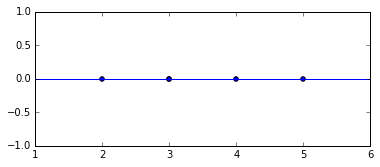

In [313]:
naive = data.copy()
naive[:,1] = 0
plot_direction(naive, [1, 0])

variance = (naive - naive.mean(axis=0)) ** 2
variance = variance.mean(axis=0)
print(variance)

We want to keep as much information, i.e. variance, in the data. Naive reduction is bad at that. PCA does the trick.

## Where PCA Fails

Methods like PCA that assume a gaussian distribution, fail for non-gaussian distributions.

Components:
 [[-0.94360238 -0.33108087]
 [ 0.33108087 -0.94360238]]
Variance: [ 25.74409071  26.46029454]


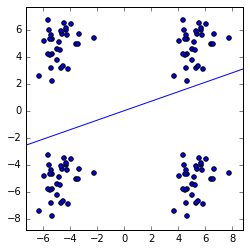

In [307]:
gaussian = np.random.normal(0, 1, (30, 2))
offset = 5
non_gaussian = np.concatenate((
    gaussian + [+offset, +offset],
    gaussian + [+offset, -offset],
    gaussian + [-offset, +offset],
    gaussian + [-offset, -offset],
))

print('Components:\n', pca(non_gaussian))
print('Variance:', non_gaussian.var(axis=0))
plot_direction(non_gaussian, pca(non_gaussian)[0])

Variance: [ 26.00165322   0.        ]


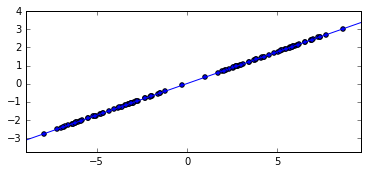

In [312]:
print('Variance:', project(non_gaussian, pca(non_gaussian))[1])
plot_direction(project(non_gaussian, pca(non_gaussian))[0], pca(non_gaussian)[0])

One solution would be to cluster the data with k-means into four clusters. Those are gaussian distributed and can be analyzed with PCA individually.